# Import and Setup

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import sys
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../WaveformAnalysis/')
import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt
import importlib
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)

<module 'PlotFunctions' from '../../WaveformAnalysis\\PlotFunctions.py'>

# Data Read-In

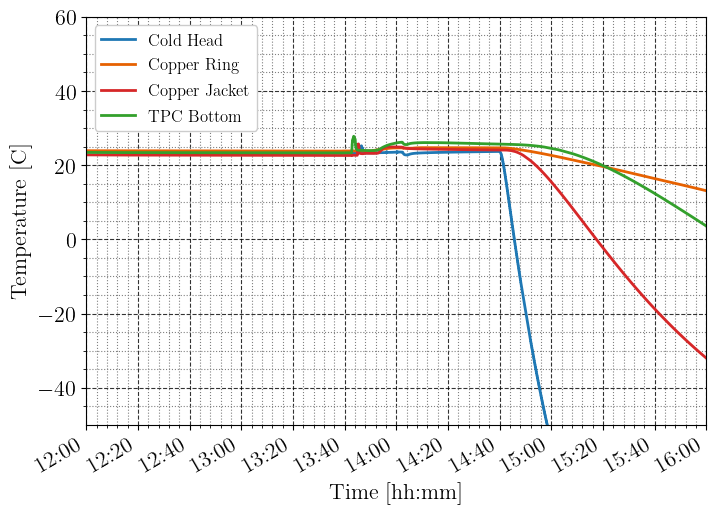

In [4]:
Sensors = []
Files = ['C:/Data/StandStatus/20210615.h5','C:/Data/StandStatus/20210616.h5']
for File in Files: 
    Sensor = Monitor.SensorData(Filepath=File)
    Sensor.GetData()
    Sensors.append(Sensor)

AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors)
XRange = [dt.datetime(2021,6,15,12,0), dt.datetime(2021,6,15,16,0)]
 
AllSensors.PlotData(Data=AllSensors.Temp, Selection='Temperature', XTicks=20, YTicks=20, XRange=XRange, YRange=[-50,60])
# AllSensors.PlotData(Data=AllSensors.SPressure, Selection='System Pressure', XTicks=240, YTicks=5, XRange=XRange, YRange=[-15,20])
# AllSensors.PlotData(Data=AllSensors.XPressure, Selection='Xenon Pressure', XTicks=240, YTicks=100, XRange=XRange, YRange=[0,850])

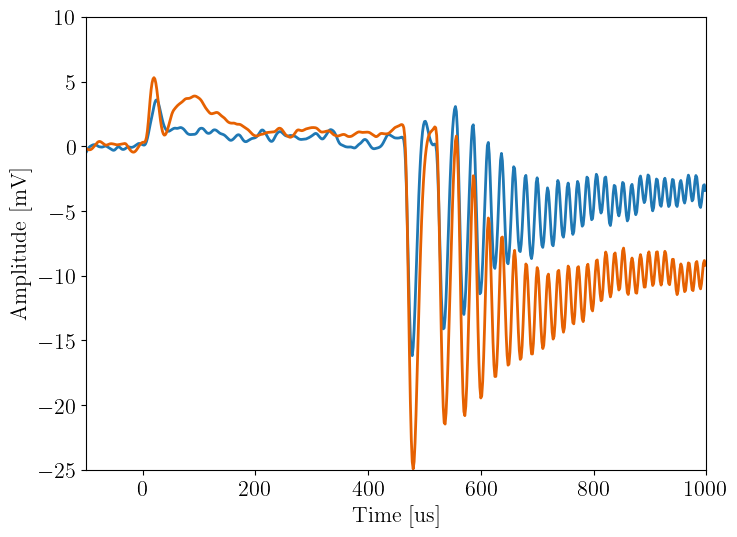

In [3]:
D0 = Dataset.Dataset(Path='C:/Data/20210616/', Selection='Noise*.h5')
D0.RunStandardAnalysis()

plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D0.Ch[0].Time, np.mean(D0.Ch[0].Amp[-50:],axis=0))
plt.plot(D0.Ch[0].Time, np.mean(D0.Ch[1].Amp[-50:],axis=0)*-1)
plt.xlim(-100,1000)
plt.show()

Charge Collection [%]: 85.60 +- 1.33
Drift time [us]: 24.17
Electron lifetime [us]: 141.23  - 172.50


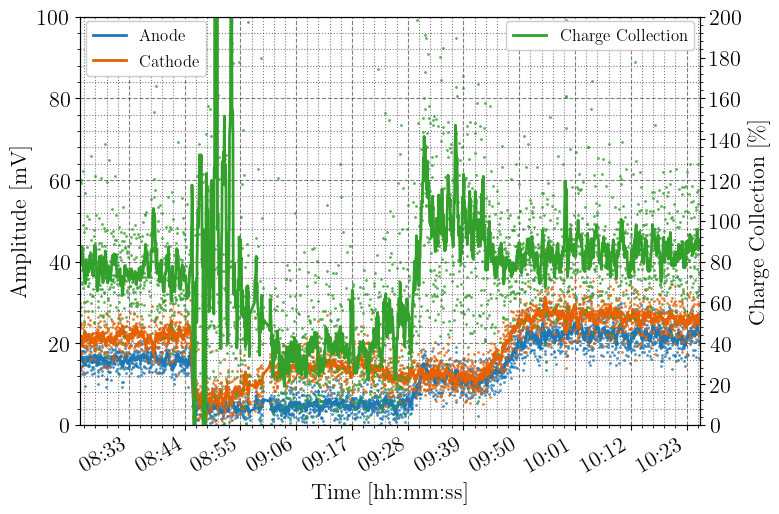

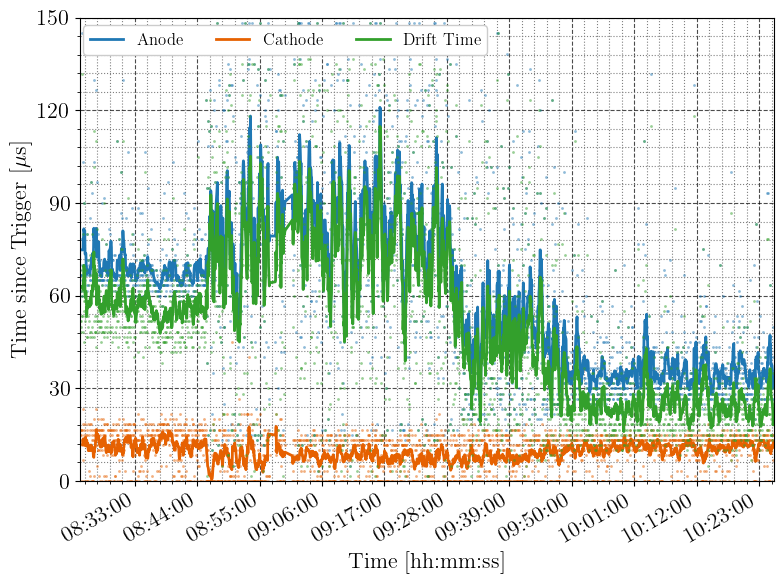

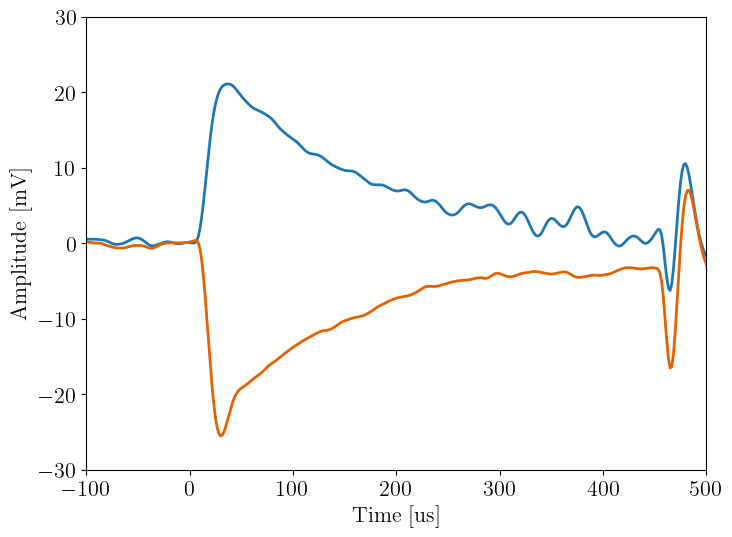

In [4]:
D1 = Dataset.Dataset(Path='C:/Data/20210616/', Selection='Filling*.h5')
D1.RunStandardAnalysis(NoiseDataset=D0)
D1.ShowAmplitudeVsTime(YTicks=20, YMax=100)
# plt.savefig('20210603_cc.png')
D1.ShowDrifttimeVsTime()

cc = np.mean(D1.ChargeCollection[-200:])
cc_err = np.std(D1.ChargeCollection[-200:])/np.sqrt(len(D1.ChargeCollection[-200:]))
dtime = np.mean(D1.DriftTime[-200:])
lifetime = -dtime/np.log(cc)
lifetime_hi =  -dtime/np.log(cc+cc_err)
lifetime_lo =  -dtime/np.log(cc-cc_err)
print("Charge Collection [%]: {:.2f} +- {:.2f}".format(cc*100, cc_err*100))
print("Drift time [us]: {:.2f}".format(dtime))
print("Electron lifetime [us]: {:.2f}  - {:.2f}".format(lifetime_lo, lifetime_hi))

plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D1.Ch[0].Time, np.mean(D1.Ch[0].Amp[-50:],axis=0))
plt.plot(D1.Ch[0].Time, np.mean(D1.Ch[1].Amp[-50:],axis=0)*-1)
plt.xlim(-100,500)
plt.show()

Charge Collection [%]: 92.87 +- 3.77
Drift time [us]: 37.17
Electron lifetime [us]: 322.02  - 1089.52


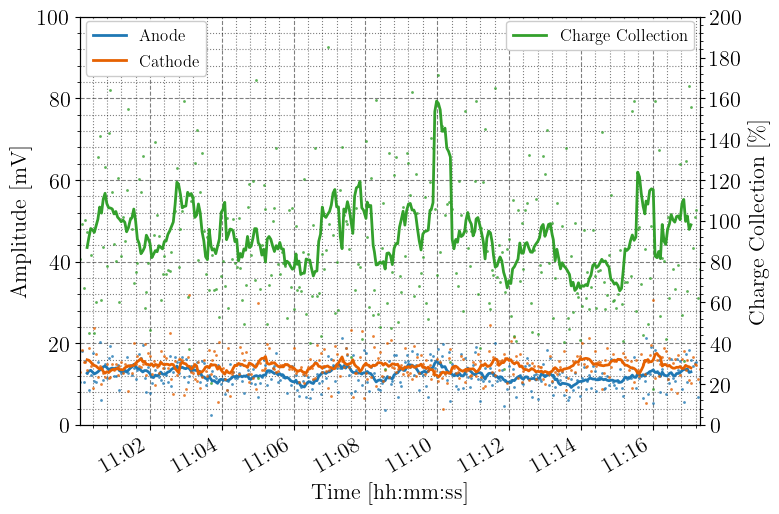

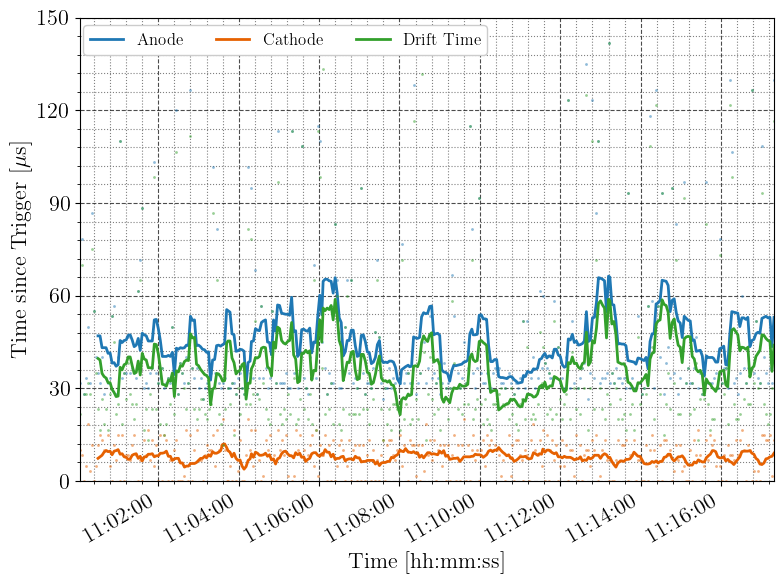

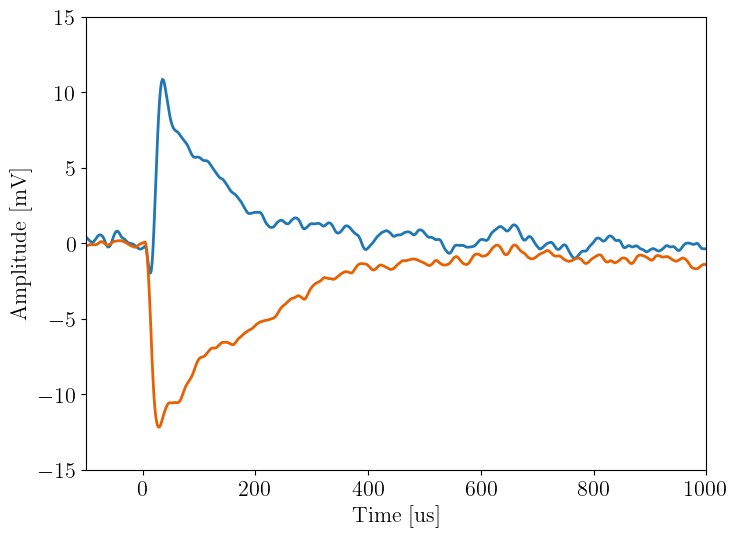

In [5]:
D2 = Dataset.Dataset(Path='C:/Data/20210616/', Selection='ChargeCollection_*.h5')
D2.RunStandardAnalysis()
D2.ShowAmplitudeVsTime(YTicks=20, YMax=100)
# plt.savefig('20210603_cc.png')
D2.ShowDrifttimeVsTime()

cc = np.mean(D2.ChargeCollection[-200:])
cc_err = np.std(D2.ChargeCollection[-200:])/np.sqrt(len(D2.ChargeCollection[-200:]))
dtime = np.mean(D2.DriftTime[-200:])
lifetime = -dtime/np.log(cc)
lifetime_hi =  -dtime/np.log(cc+cc_err)
lifetime_lo =  -dtime/np.log(cc-cc_err)
print("Charge Collection [%]: {:.2f} +- {:.2f}".format(cc*100, cc_err*100))
print("Drift time [us]: {:.2f}".format(dtime))
print("Electron lifetime [us]: {:.2f}  - {:.2f}".format(lifetime_lo, lifetime_hi))

plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D2.Ch[0].Time, np.mean(D2.Ch[0].Amp[-50:],axis=0))
plt.plot(D2.Ch[0].Time, np.mean(D2.Ch[1].Amp[-50:],axis=0)*-1)
plt.xlim(-100,1000)
plt.show()

In [21]:
D3 = Dataset.Dataset(Path='C:/Data/20210616/', Selection='ChargeCollectionL*.h5')
D3.RunStandardAnalysis()
D3.ShowAmplitudeVsTime(YTicks=20, YMax=100)
D3.ShowDrifttimeVsTime()

cc = np.mean(D3.ChargeCollection)
cc_err = np.std(D3.ChargeCollection)/np.sqrt(len(D3.ChargeCollection))
dtime = np.mean(D3.DriftTime)
lifetime = -dtime/np.log(cc)
lifetime_hi =  -dtime/np.log(cc+cc_err)
lifetime_lo =  -dtime/np.log(cc-cc_err)
print("Charge Collection [%]: {:.2f} +- {:.2f}".format(cc*100, cc_err*100))
print("Drift time [us]: {:.2f}".format(dtime))
print("Electron lifetime [us]: {:.2f}  - {:.2f}".format(lifetime_lo, lifetime_hi))

plt.figure()
maxbin = 10
plt.hist(D3.Ch[0].Integral, bins=np.linspace(-1,maxbin,100), alpha=1, histtype='step', label='Anode')
plt.hist( D3.Ch[1].Integral,  bins=np.linspace(-1,maxbin,100),alpha=1, histtype='step', label='Cathode')
# plt.ylim(0,2)
plt.hist(D3.Ch[0].Integral/D3.Ch[1].Integral, bins=np.linspace(-1,maxbin,100),  alpha=1, histtype='step', label='CC')
plt.vlines(x = np.mean(D3.Ch[0].Integral/D3.Ch[1].Integral), ymin=0, ymax = 50)
print( np.mean(D3.Ch[0].Integral/D3.Ch[1].Integral))
plt.legend(loc='upper right')
plt.show()

# plt.figure()
# plt.hist(D3.ChargeCollection, bins=20)
# plt.show()

# plt.figure()
# plt.xlabel('Time [us]')
# plt.ylabel('Amplitude [mV]')
# plt.plot(D2.Ch[0].Time, np.mean(D2.Ch[0].Amp,axis=0), ls="--")
# plt.plot(D2.Ch[0].Time, np.mean(D2.Ch[1].Amp,axis=0)*-1, ls="--")
# plt.plot(D3.Ch[0].Time, np.mean(D3.Ch[0].Amp,axis=0), ls="-")
# plt.plot(D3.Ch[0].Time, np.mean(D3.Ch[1].Amp,axis=0)*-1, ls="-")
# plt.xlim(-100,1000)
# plt.show()

ValueError: 'step' must be positive

In [5]:
D4 = Dataset.Dataset(Path='C:/Data/20210616/', Selection='Purify*.h5')
D4.RunStandardAnalysis()
D4.ShowAmplitudeVsTime(YTicks=20, YMax=100)
D4.ShowDrifttimeVsTime(YMax=50)
plt.close()

cc = np.mean(D4.ChargeCollection[D4.ChargeCollection>0][-50:])
cc_err = np.std(D4.ChargeCollection[-50:])/np.sqrt(len(D4.ChargeCollection[-50:]))
dtime = np.mean(D4.DriftTime[-50:])
lifetime = -dtime/np.log(cc)
lifetime_hi =  -dtime/np.log(cc+cc_err)
lifetime_lo =  -dtime/np.log(cc-cc_err)
print("Charge Collection [%]: {:.2f} +- {:.2f}".format(cc*100, cc_err*100))
print("Drift time [us]: {:.2f}".format(dtime))
print("Electron lifetime [us]: {:.2f}  - {:.2f}".format(lifetime_lo, lifetime_hi))

plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D4.Ch[0].Time, np.mean(D4.Ch[0].Amp[-100:],axis=0), ls="-")
plt.plot(D4.Ch[0].Time, np.mean(D4.Ch[1].Amp[-100:],axis=0)*-1, ls="-")
plt.plot(D4.Ch[0].Time, np.mean(D4.Ch[0].Amp[:50],axis=0), ls="-")
plt.plot(D4.Ch[0].Time, np.mean(D4.Ch[1].Amp[:50],axis=0)*-1, ls="-")
plt.xlim(-100,200)
plt.show()
# plt.close()

Charge Collection [%]: 109.89 +- 2.21
Drift time [us]: 31.96
Electron lifetime [us]: -431.83  - -279.93


In [4]:
%matplotlib
plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111)
avg=10
for ii,x in enumerate(D4.Ch[1].Amp):
    if ii > (np.shape(D4.Ch[1].Amp)[0]/avg):
        break
    ax.clear()
    ax.plot(D4.Ch[0].Time,np.mean(D4.Ch[0].Amp[ii*avg:(ii+1)*avg], axis=0), label='Anode')
    ax.plot(D4.Ch[0].Time, np.mean(D4.Ch[1].Amp[ii*avg:(ii+1)*avg], axis=0)*-1, label='Cathode')
    plt.xlim(-200,500)
    plt.ylim(-50,50)
    plt.legend()
    fig.canvas.draw()
    fig.canvas.flush_events()

Using matplotlib backend: Qt5Agg
